NAME : KEVIN ADITYA PRATAMA

STUDENT ID : 1101220014

In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pandas.plotting import autocorrelation_plot 
from pandas import DataFrame 
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns 
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df_transaction = pd.read_csv('Case_Study_Transaction.csv', sep = ';')
df_customer = pd.read_csv('Case_Study_Customer.csv', sep = ';')
df_store = pd.read_csv('Case_Study_Store.csv', sep = ';')
df_product = pd.read_csv('Case_Study_Product.csv', sep = ';')

In [4]:
df_transaction

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13


In [6]:
df_customer

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"
...,...,...,...,...,...
442,443,33,1,NaN,"9,28"
443,444,53,0,Married,"15,31"
444,445,51,0,Married,"14,48"
445,446,57,0,Married,"7,81"


In [11]:
df_store

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"
5,6,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
6,7,Buana Indah,Buana,General Trade,"3,316694","114,590111"
7,8,Sinar Harapan,Harapan Baru,General Trade,"5,54829","95,323753"
8,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"


In [13]:
df_product

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


In [15]:
df_customer['Income'] = df_customer['Income'].replace('[,]','.',regex=True)

In [17]:
df_store['Latitude'] = df_store['Latitude'].replace('[,]','.',regex=True)
df_store['Longitude'] =df_store['Longitude'].replace('[,]','.', regex=True)

In [19]:
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'], format='%d/%m/%Y')

In [21]:
df_merge = pd.merge(df_transaction, df_customer, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product.drop(columns=['Price']), on=['ProductID'])
df_merge = pd.merge(df_merge, df_store, on=['StoreID'])

In [23]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,Prima Tendean,Prima,Modern Trade,-6.2,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,0.18,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,12.57,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [25]:
df_regresi = df_merge.groupby(['Date']).agg({'Qty' : 'sum'}).reset_index()

In [27]:
df_regresi

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


In [29]:
 #Split Data
 split_index = int(len(df_regresi) * 0.8)
 df_train = df_regresi.iloc[:split_index].copy()
 df_test = df_regresi.iloc[split_index:].copy()

In [31]:
def eval(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"MAE: {mae}, MSE: {mse}")

Index(['Date', 'Qty'], dtype='object')


C:\Users\ASUS ROG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS ROG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS ROG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS ROG\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ASUS ROG\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

Mean Squared Error: 214.46309189819962
Mean Absolute Error: 12.02358668009268


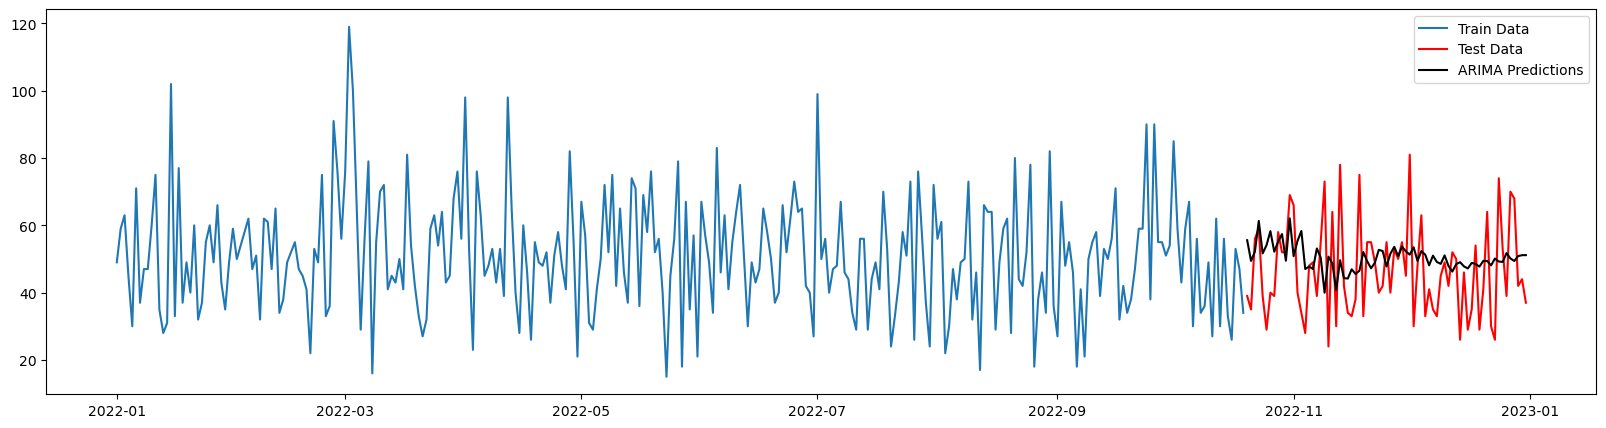

In [33]:
# Pastikan kolom 'Date' ada dan menghapus spasi ekstra pada nama kolom
df_train.columns = df_train.columns.str.strip()
df_test.columns = df_test.columns.str.strip()

# Mengecek kolom yang ada di df_train
print(df_train.columns)

# Periksa apakah kolom 'Date' ada dalam DataFrame
if 'Date' in df_train.columns:
    # Konversi kolom 'Date' ke datetime jika kolom ada
    df_train['Date'] = pd.to_datetime(df_train['Date'], errors='coerce')
    df_test['Date'] = pd.to_datetime(df_test['Date'], errors='coerce')
    
    # Set 'Date' sebagai index
    df_train = df_train.set_index('Date')
    df_test = df_test.set_index('Date')

    # Menyiapkan variabel untuk model ARIMA
    y = df_train['Qty']

    # Menyusun model ARIMA
    ARIMAmodel = ARIMA(y, order=(40, 2, 1))
    ARIMAmodel = ARIMAmodel.fit()

    # Membuat prediksi
    y_pred = ARIMAmodel.get_forecast(len(df_test))
    y_pred_df = y_pred.conf_int()
    y_pred_df['predictions'] = ARIMAmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

    # Menyesuaikan index prediksi dengan index df_test
    y_pred_df.index = df_test.index
    y_pred_out = y_pred_df['predictions']

    # Evaluasi model dengan MSE
    mse = mean_squared_error(df_test['Qty'], y_pred_out)
    mae = mean_absolute_error(df_test['Qty'], y_pred_out)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')

    # Plotting hasil dengan memastikan grafik muncul
    plt.figure(figsize=(20, 5))  # Ukuran grafik
    plt.plot(df_train['Qty'], label='Train Data')
    plt.plot(df_test['Qty'], color='red', label='Test Data')
    plt.plot(y_pred_out, color='black', label='ARIMA Predictions')
    plt.legend()
    plt.show()  # Pastikan plt.show() ada agar grafik muncul

else:
    print("Kolom 'Date' tidak ditemukan dalam DataFrame.")